# Notebook for checking latency

In [ ]:
# each actor gets there own latency dataframe to check the time of the run step
# concatenate frames together to get total latency for a given frame 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# with spike counts included

In [11]:
gen_df = pd.read_pickle("../latency/generator_latency_20250520-192022.pkl")
processor_df = pd.read_pickle("../latency/processor_latency_20250520-192022.pkl")
viz_df = pd.read_pickle("../latency/visual_latency_20250520-192022.pkl")

# without spike count calculation

In [ ]:
gen_df = pd.read_pickle("../latency/generator_latency_20250520-182959.pkl")
processor_df = pd.read_pickle("../latency/processor_latency_20250520-182959.pkl")
viz_df = pd.read_pickle("../latency/visual_latency_20250520-182959.pkl")

In [ ]:
gen_df

In [ ]:
x = list(gen_df["frame number"])
y = list(gen_df["latency"])

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3)
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Generator Latency")
plt.show()

In [ ]:
print(sum(y) / len(y))

In [ ]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Generator Latency")

In [ ]:
processor_df

In [ ]:
x = list(processor_df["frame number"])
y = list(processor_df["latency"])

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3, c="red")
plt.ylabel("latency (ms)")
plt.xlabel("frame num")
plt.title("Processor Latency")
plt.show()

In [ ]:
print(sum(y) / len(y))

In [ ]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Processing Time")

In [ ]:
x = list(viz_df["frame number"])
y = list(viz_df["latency"])

plt.figure(figsize=(14, 6))
plt.scatter(x=x,y=y, s=3, c="green")
plt.ylabel("latency (s)")
plt.xlabel("frame num")
plt.title("Visual Latency")
plt.show()

In [ ]:
print(sum(y) / len(y))

In [ ]:
plt.hist(y)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Visual Latency")

## Total Latency

In [12]:
gen_y = list(gen_df["latency"])[27:]

In [13]:
proc_y = list(processor_df["latency"])[27:]

In [14]:
viz_y =  list(viz_df["latency"])[27:]

In [15]:
total_latency = [x + y + z for x, y, z in zip(gen_y, proc_y, viz_y)]

Text(0.5, 1.0, 'Total Latency')

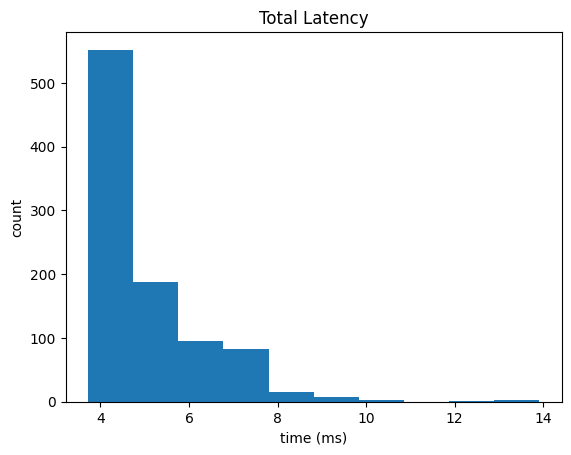

In [16]:
plt.hist(total_latency)
plt.ylabel("count")
plt.xlabel("time (ms)")
plt.title("Total Latency")

In [17]:
sum(total_latency) / len(total_latency)

5.029895443505808